# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [42]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

In [43]:
# Read csv file using pandas
df=pd.read_csv("/content/detect_dataset (1).csv")

In [44]:
df[df['Output (S)']==1]

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
504,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,NaN,NaN
505,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,NaN,NaN
506,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,NaN,NaN
507,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,NaN,NaN
508,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9631,1,130.117188,-19.541395,19.717378,0.359460,-0.579100,0.219640,NaN,NaN
9632,1,116.522025,-20.282441,20.083174,0.361053,-0.577090,0.216037,NaN,NaN
9633,1,102.899531,-20.981157,20.404671,0.362540,-0.574888,0.212348,NaN,NaN
9634,1,89.239696,-21.648872,20.675159,0.363919,-0.572499,0.208581,NaN,NaN


# basic EDA

In [45]:
#check shape of the dataset
df.shape

(12001, 9)

In [46]:
# check columns of dataset
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [47]:
# check length of dataset
df.shape[0]

12001

In [48]:
# Check which columns are having categorical, numerical or boolean values
df.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [49]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [50]:
# Check for missing values in all the columnns of the dataset
df.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [51]:
# loop through datatset to find count of unique values of each column
df.nunique()


Output (S)        2
Ia            12001
Ib            12001
Ic            12001
Va            11996
Vb            11813
Vc            11987
Unnamed: 7        0
Unnamed: 8        0
dtype: int64

In [52]:
# drop 'Unnamed: 7','Unnamed: 8'
df.drop(["Unnamed: 7","Unnamed: 8"],axis=1,inplace=True)

In [53]:
# check total number of fault and no-fault instances
df["Output (S)"].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

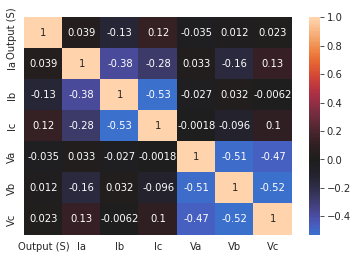

In [54]:

# Using pandas
import matplotlib.pyplot as plt

import seaborn as sns 

sns.heatmap(df.corr(),annot=True,center=0)
plt.show()

# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

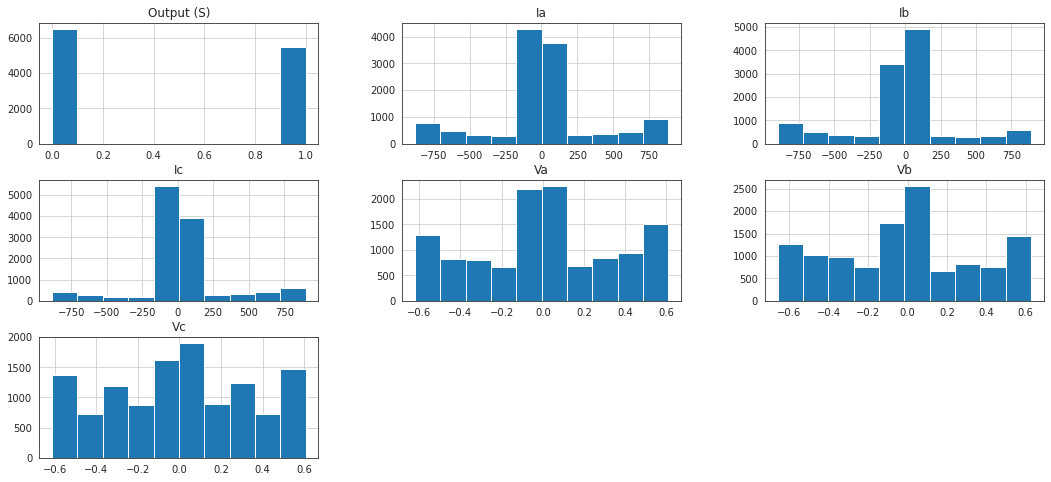

In [55]:
# Histogram using pandas 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df.hist(figsize=(18,8))
plt.show()

### Count plot

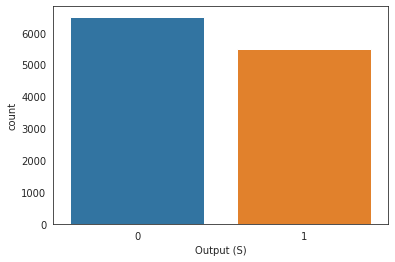

In [56]:
# count plot of Output (S) column
import seaborn as sns
sns.set_style("white")
sns.countplot(x="Output (S)",data=df)
plt.show()

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

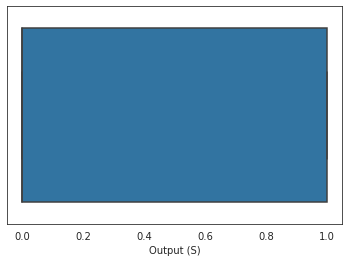

In [57]:
# box plot using pandas 

sns.boxplot(x="Output (S)",data=df)
plt.show()

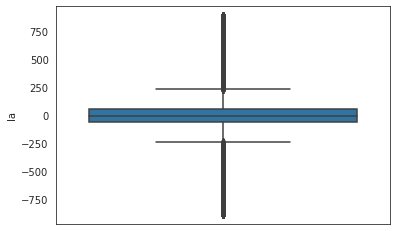

In [58]:
# box plot using pandas 
# box plot for Ia column 
sns.boxplot(y="Ia",data=df)
plt.show()

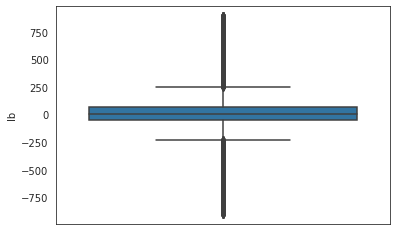

In [59]:
# box plot using pandas 
# box plot for Ib column 
sns.boxplot(y="Ib",data=df)
plt.show()


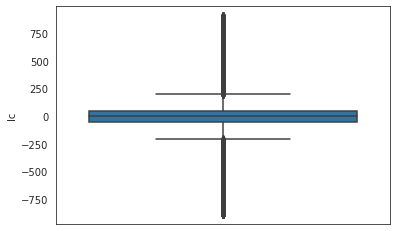

In [60]:
# box plot using pandas 
# box plot for Ic column 
sns.boxplot(y="Ic",data=df)
plt.show()


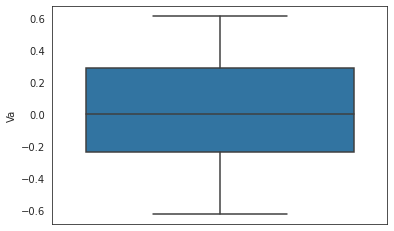

In [61]:
# box plot using pandas 
# box plot for Va column 
sns.boxplot(y="Va",data=df)
plt.show()


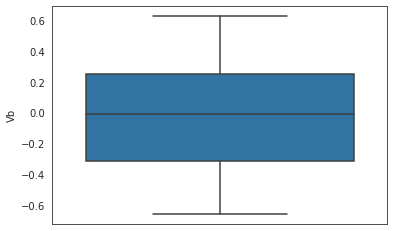

In [62]:
# box plot using pandas 
# box plot for Vb column 
sns.boxplot(y="Vb",data=df)
plt.show()


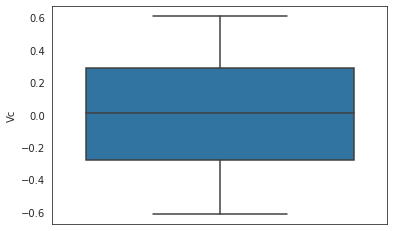

In [63]:
# box plot using pandas 
# box plot for Vc column 
sns.boxplot(y="Vc",data=df)
plt.show()


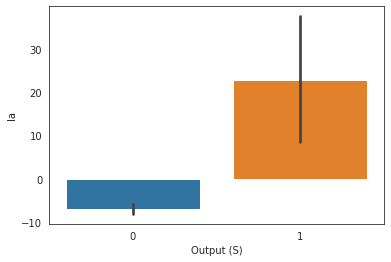

In [64]:
sns.barplot(x="Output (S)",y="Ia",data=df)
plt.show()

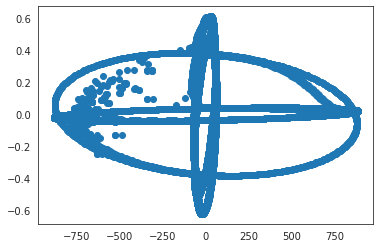

In [65]:
plt.scatter(x="Ia",y="Va",data=df)
plt.show()

Dataset is balanced and not skewed in nature

# Dendrogram

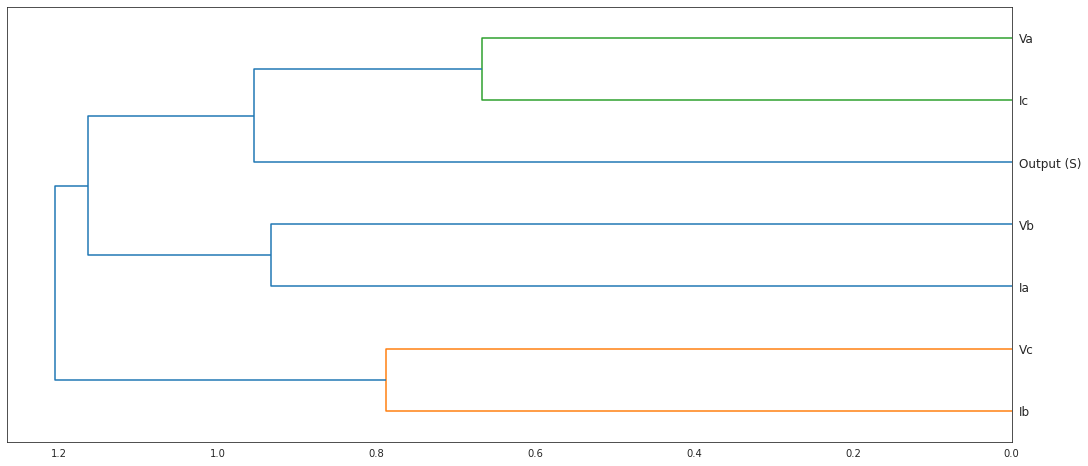

In [66]:
import scipy
import scipy.cluster.hierarchy as hc
corr=np.round(scipy.stats.spearmanr(df).correlation,4)
corr_condensed=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed,method="average")
plt.figure(figsize=(18,8))
dendogram=hc.dendrogram(z,labels=df.columns,orientation="left")
plt.show()

# Preprocessing, Modeling and prediction on test data

In [67]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [68]:
## Split the labels and the target
x=df.drop("Output (S)",axis=1)
y=df["Output (S)"]
#check the shape 
print(x.shape)
print(y.shape)

(12001, 6)
(12001,)


In [69]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

# check shape of X_train and y_train
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


# check shape of X_test and y_test


(9600, 6)
(2401, 6)
(9600,)
(2401,)


### Scaling

In [70]:
# import min max scalar
from sklearn.preprocessing import MinMaxScaler

# Instantiate t
mod=MinMaxScaler()

# fit on train data
x_train=pd.DataFrame(mod.fit_transform(x_train),columns=x_train.columns)

# fit on test data
x_test=pd.DataFrame(mod.fit_transform(x_test),columns=x_test.columns)

In [71]:
x_test.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,0.487887,0.494055,0.513061,0.947535,0.150680,0.437835
1,0.497119,0.472116,0.525548,0.985454,0.195352,0.352541
2,0.966562,0.115130,0.421824,0.508897,0.482241,0.529772
3,0.633922,0.353047,0.512743,0.536981,0.095577,0.909307
4,0.469323,0.505733,0.522754,0.744435,0.049203,0.749348


In [72]:
# Visualize importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances, feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_importance_df =pd.DataFrame() 
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], 
                                      axis=0, ignore_index=True)
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column').sum()[['feature_importance']].sort_values('feature_importance', ascending=False).index[:50]
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    # return fig, ax
    return fig, ax


In [73]:
# import accuracy_score, precision_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,plot_confusion_matrix

## LogisticRegression

accuracy_score:0.7122032486463973
precision_score:0.9976470588235294
recall_score:0.38061041292639136
confusion_matrix:[[1286    1]
 [ 690  424]]


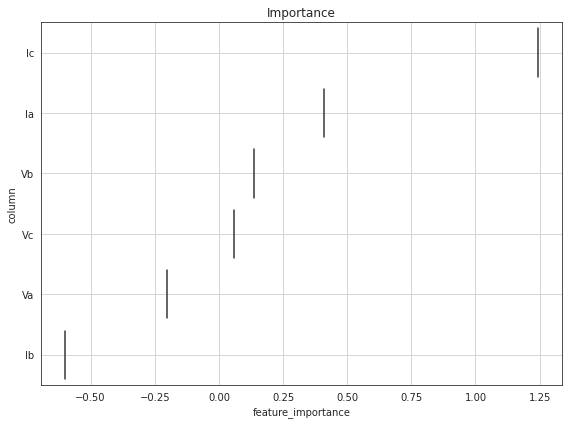

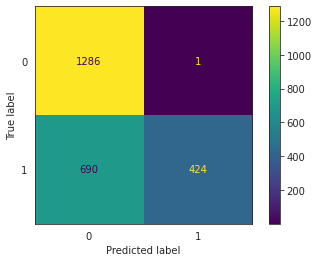

CPU times: user 662 ms, sys: 237 ms, total: 900 ms
Wall time: 676 ms


In [74]:
%%time
# Fit a logistic Regression model to the train dataset
# Import logisticRegressor
from sklearn.linear_model import LogisticRegression
# Instantiate the model
logit=LogisticRegression()
# fitting the model on train data
logit.fit(x_train,y_train)
#predict on test data
y_pred=logit.predict(x_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")
print(f"recall_score:{recall_score(y_test,y_pred)}")
print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")
# visualizing importance of features
visualize_importance(logit.coef_[0],x_train)
# display confusion matrix
plot_confusion_matrix(logit,x_test,y_test)
plt.show()

## RandomForestClassifier

accuracy_score:0.9912536443148688
precision_score:0.9927862939585211
recall_score:0.9883303411131059
confusion_matrix:[[1279    8]
 [  13 1101]]


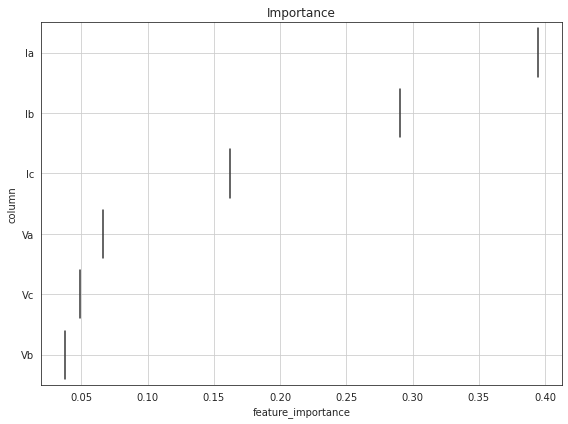

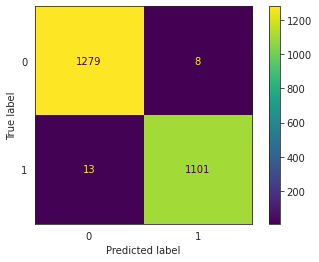

CPU times: user 2 s, sys: 136 ms, total: 2.14 s
Wall time: 2.15 s


In [75]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model

randommodel=RandomForestClassifier()
# fitting the model on train data
randommodel.fit(x_train,y_train)

# predict on test data

y_pred=randommodel.predict(x_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
visualize_importance(randommodel.feature_importances_,x_train)

# display confusion matrix
plot_confusion_matrix(randommodel,x_test,y_test)
plt.show()

## DecisionTreeClassifier

accuracy_score:0.9887546855476884
precision_score:0.9891989198919892
recall_score:0.9865350089766607
confusion_matrix:[[1275   12]
 [  15 1099]]


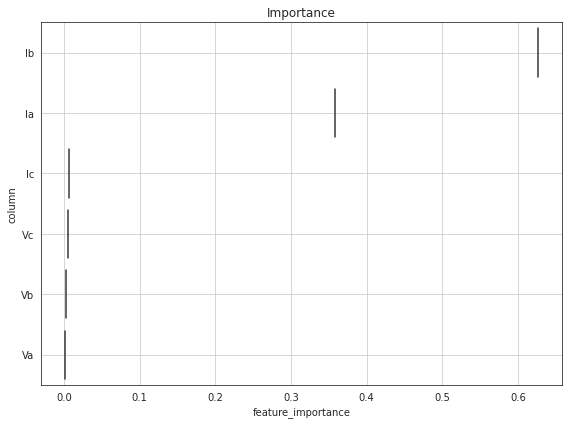

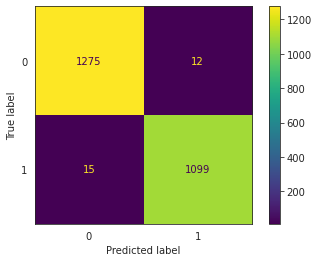

CPU times: user 762 ms, sys: 123 ms, total: 885 ms
Wall time: 766 ms


In [76]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
decisionmodel=DecisionTreeClassifier()

# fitting the model on train data
decisionmodel.fit(x_train,y_train)

# predict on test data

y_pred=decisionmodel.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
visualize_importance(decisionmodel.feature_importances_,x_train)

# display confusion matrix
plot_confusion_matrix(decisionmodel,x_test,y_test)
plt.show()

## GradientBoostingClassifier

accuracy_score:0.9879216992919617
precision_score:0.9945305378304466
recall_score:0.9793536804308797
confusion_matrix:[[1281    6]
 [  23 1091]]


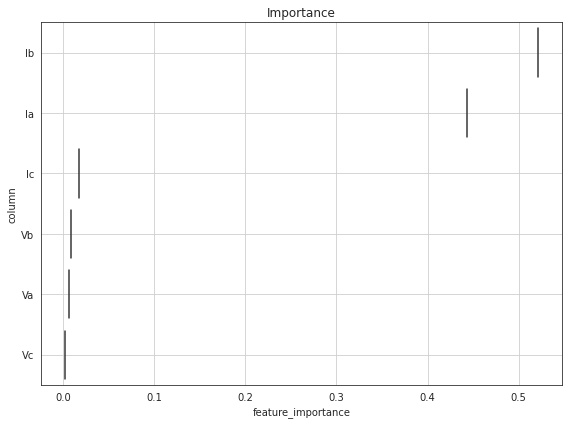

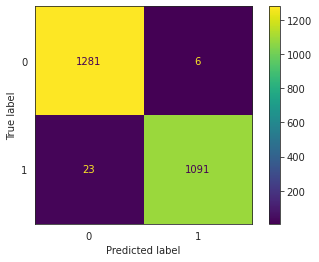

CPU times: user 2.78 s, sys: 104 ms, total: 2.89 s
Wall time: 2.77 s


In [77]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gradientmodel=GradientBoostingClassifier()

# fitting the model on train data
gradientmodel.fit(x_train,y_train)

# predict on test data
y_pred=gradientmodel.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
visualize_importance(gradientmodel.feature_importances_,x_train)

# display confusion matrix
plot_confusion_matrix(gradientmodel,x_test,y_test)
plt.show()

accuracy_score:0.9887546855476884
precision_score:0.9918552036199095
recall_score:0.9838420107719928
confusion_matrix:[[1278    9]
 [  18 1096]]


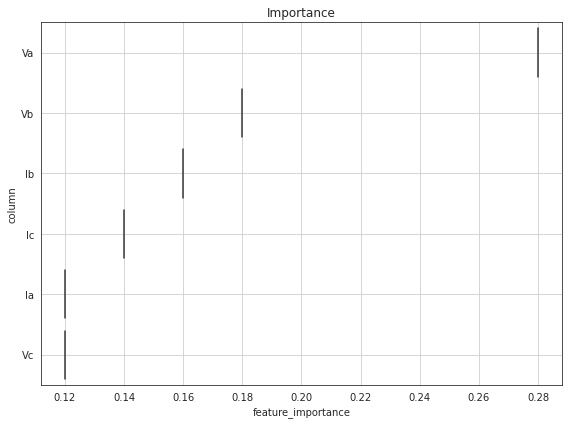

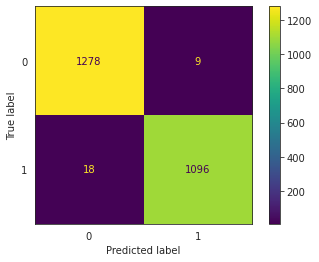

In [78]:
#Adaboosting classifier

from sklearn.ensemble import AdaBoostClassifier
adamodel=AdaBoostClassifier()
adamodel.fit(x_train,y_train)
y_pred=adamodel.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
visualize_importance(adamodel.feature_importances_,x_train)

# display confusion matrix
plot_confusion_matrix(adamodel,x_test,y_test)
plt.show()


In [79]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


accuracy_score:0.9870887130362349
precision_score:0.9963336388634281
recall_score:0.9757630161579892
confusion_matrix:[[1283    4]
 [  27 1087]]


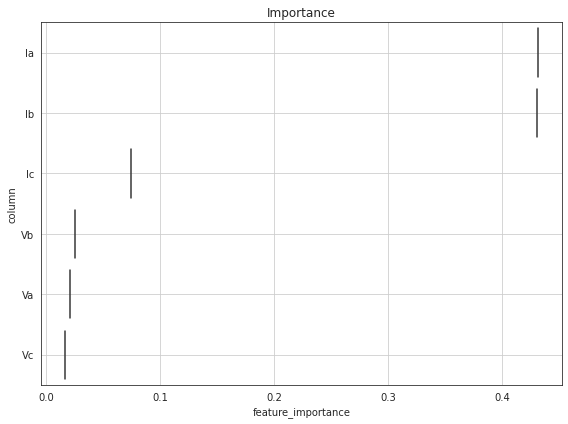

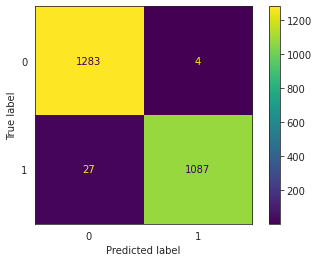

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1287
           1       1.00      0.98      0.99      1114

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
visualize_importance(xgb.feature_importances_,x_train)

# display confusion matrix
plot_confusion_matrix(xgb,x_test,y_test)
plt.show()
print(classification_report(y_test,y_pred))

accuracy_score:0.9958350687213661
precision_score:0.9911032028469751
recall_score:1.0
confusion_matrix:[[1277   10]
 [   0 1114]]


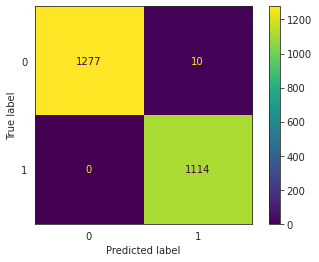

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1287
           1       0.99      1.00      1.00      1114

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



In [81]:
###knn
from sklearn.neighbors import KNeighborsClassifier
mo=KNeighborsClassifier()
mo.fit(x_train,y_train)
y_pred=mo.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
#visualize_importance(mo.coef_[0],x_train)

# display confusion matrix
plot_confusion_matrix(mo,x_test,y_test)
plt.show()
print(classification_report(y_test,y_pred))

accuracy_score:0.973344439816743
precision_score:0.9990494296577946
recall_score:0.9434470377019749
confusion_matrix:[[1286    1]
 [  63 1051]]


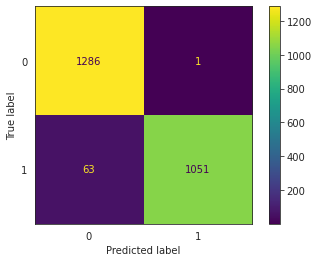

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1287
           1       1.00      0.94      0.97      1114

    accuracy                           0.97      2401
   macro avg       0.98      0.97      0.97      2401
weighted avg       0.97      0.97      0.97      2401



In [84]:
#naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
gaus=GaussianNB()
gaus.fit(x_train,y_train)
y_pred=gaus.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
#visualize_importance(gaus.coef_[0],x_train)

# display confusion matrix
plot_confusion_matrix(gaus,x_test,y_test)
plt.show()
print(classification_report(y_test,y_pred))

accuracy_score:0.5360266555601833
precision_score:0.0
recall_score:0.0
confusion_matrix:[[1287    0]
 [1114    0]]


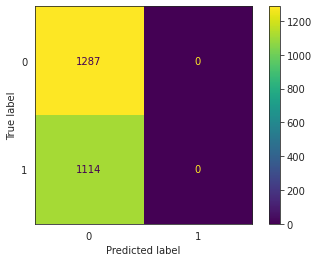

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1287
           1       0.00      0.00      0.00      1114

    accuracy                           0.54      2401
   macro avg       0.27      0.50      0.35      2401
weighted avg       0.29      0.54      0.37      2401



In [85]:
from sklearn.naive_bayes import MultinomialNB
multi=MultinomialNB()
multi.fit(x_train,y_train)
y_pred=multi.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
#visualize_importance(multi.coef_[0],x_train)

# display confusion matrix
plot_confusion_matrix(multi,x_test,y_test)
plt.show()
print(classification_report(y_test,y_pred))

accuracy_score:0.5372761349437735
precision_score:1.0
recall_score:0.0026929982046678637
confusion_matrix:[[1287    0]
 [1111    3]]


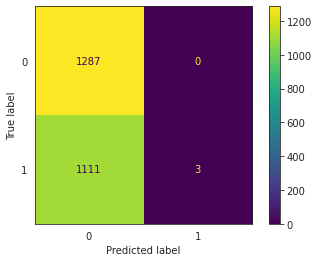

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1287
           1       1.00      0.00      0.01      1114

    accuracy                           0.54      2401
   macro avg       0.77      0.50      0.35      2401
weighted avg       0.75      0.54      0.38      2401



In [86]:
from sklearn.naive_bayes import CategoricalNB
catego=CategoricalNB()
catego.fit(x_train,y_train)
y_pred=catego.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
#visualize_importance(catego.coef_[0],x_train)

# display confusion matrix
plot_confusion_matrix(catego,x_test,y_test)
plt.show()
print(classification_report(y_test,y_pred))

## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [101]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
%time
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":[100,150,200],"max_depth":[10,7,4,15,20,6,8,9],"min_samples_split":np.arange(2,10),"min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","sqrt","log_loss"]}
  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
randmodel=RandomizedSearchCV(
    estimator=randommodel,
    param_distributions=parameters,
    n_jobs=-1,
    cv=5,
    scoring="f1",
    verbose=0
)
  # Fit the random search model
randmodel.fit(x_train,y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=15,
                                                    min_samples_leaf=5,
                                                    min_samples_split=7,
                                                    n_estimators=150),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 7, 4, 15, 20, 6, 8,
                                                      9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log_loss'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [100, 150, 200]},
                   scoring='f1')

In [103]:
randmodel.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

accuracy_score:0.9912536443148688
precision_score:0.9927862939585211
recall_score:0.9883303411131059
confusion_matrix:[[1279    8]
 [  13 1101]]


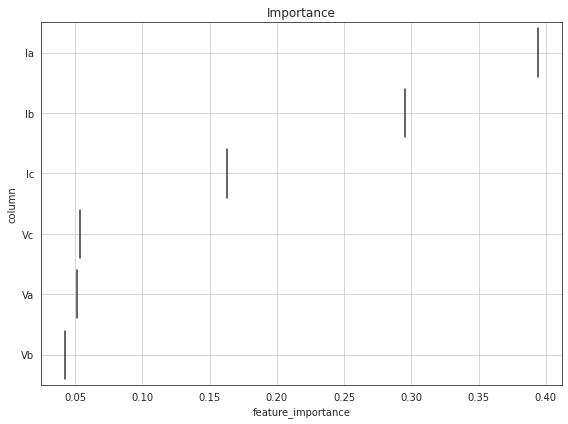

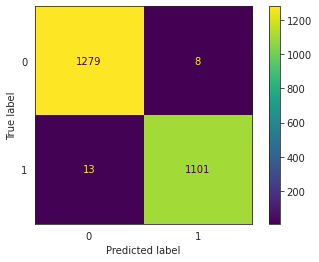

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1287
           1       0.99      0.99      0.99      1114

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401

CPU times: user 1.93 s, sys: 104 ms, total: 2.04 s
Wall time: 1.94 s


In [102]:
%%time
# for random forest classifier
randommodel=RandomForestClassifier(**randmodel.best_params_)
randommodel.fit(x_train,y_train)
y_pred=randommodel.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")
print(f"precision_score:{precision_score(y_test,y_pred)}")

print(f"recall_score:{recall_score(y_test,y_pred)}")

print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")


# visualizing importance of features
visualize_importance(randommodel.feature_importances_,x_train)

# display confusion matrix
plot_confusion_matrix(randommodel,x_test,y_test)
plt.show()
print(classification_report(y_test,y_pred))




### working with best model

In [107]:
# print Area under ROC of Model On Test Set
from sklearn.metrics import roc_auc_score
print(f"Area under ROC of Model On Test Set {roc_auc_score(y_test,y_pred)*100}%")

Area under ROC of Model On Test Set 99.10571674485497%


In [108]:
# Create a dataframe with predicted result as data using best model

res_df=pd.DataFrame(y_pred)

In [109]:
res_df.head()

,0
0,0
1,0
2,1
3,1
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.

## Congratulation for completing the assignment.

> Indented block


You have learned a lot while doing this assignment.